# Introduction

Effective screening of SARS-CoV-2 enables quick and efficient diagnosis of COVID-19 and can mitigate the burden on healthcare systems. 
Prediction models that combine several features to estimate the risk of infection have been developed. 
These aim to assist medical staff worldwide in triaging patients, especially in the context of limited healthcare resources.
We are planning to analyze the data obtained from from ‘ABC’ government website that contains around 2,78,848 individuals who have gone through the RT-PCR test. 

In [1]:
# importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline

## Specifying the datatype of every column.

In [2]:
dtype={'Ind_ID':'str','Test_date':'str','Cough_symptoms':'boolean','Fever':'boolean','Sore_throat':'boolean','Shortness_of_breath':'boolean','Headache':'boolean',
'Corona':'str','Age_60_above':'str','Sex':'str','Known_contact':'str'}
df =pd.read_csv('corona_tested_006.csv',dtype=dtype)

## Checking the data

In [3]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


## Shape of the data

In [4]:
df.shape

(278848, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Ind_ID               278848 non-null  object 
 1   Test_date            278848 non-null  object 
 2   Cough_symptoms       278596 non-null  boolean
 3   Fever                278596 non-null  boolean
 4   Sore_throat          278847 non-null  boolean
 5   Shortness_of_breath  278847 non-null  boolean
 6   Headache             278847 non-null  boolean
 7   Corona               278848 non-null  object 
 8   Age_60_above         151528 non-null  object 
 9   Sex                  259285 non-null  object 
 10  Known_contact        278848 non-null  object 
dtypes: boolean(5), object(6)
memory usage: 15.4+ MB


In [6]:
df.isna().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

# Exploratory Data Handling and Visualization

Questions to be answered
1) Comparison of no of positive cases in both the genders
2) Analyze the column 'Known_Contact'.Study which category has most positive cases
3) Observe and Analyze if the symptom 'cough' is correlated with Corona.
4) Number of positive cases when the patient had a headache
5) Is Sore_throat an important symptom when it comes to testing for Corona.
6) Is fever a reliable symptom to predict Corona.

<Axes: xlabel='Sex', ylabel='Count'>

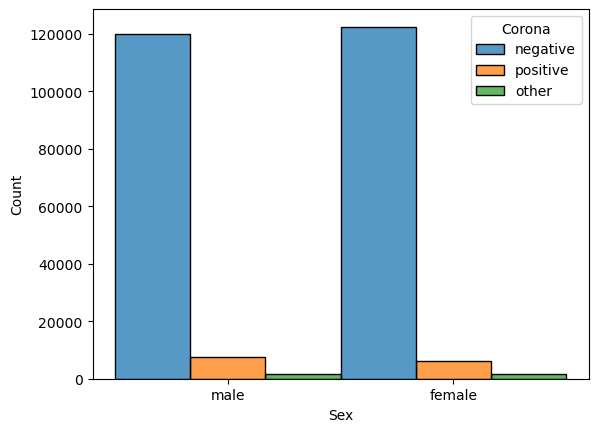

In [7]:
sns.histplot(df,x='Sex',hue='Corona',multiple='dodge')

We can infer that the number of females is slightly more than the males.
No of males having corona is slightly more than the females.

In [8]:
#Checking the number of females with Corona
print(len(df.loc[(df['Sex']=='female') & (df['Corona']=='positive')])/len(df.loc[df['Sex']=='female'])*100)

# Checking the number of males with Corona
print(len(df.loc[(df['Sex']=='male') & (df['Corona']=='positive')])/len(df.loc[df['Sex']=='male'])*100)

4.641282134021727
5.822949499330117


Number of males with corona is slightly more than females

<Axes: xlabel='Known_contact', ylabel='Count'>

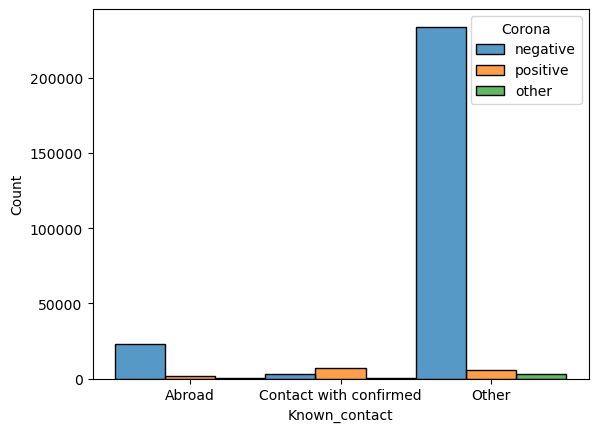

In [9]:
sns.histplot(df,x='Known_contact',hue='Corona',multiple='dodge')

Almost 87% of the patients belong to the category 'other'.
The number of positive cases in the 'other' category is lowest as compared to the rest of the categories.
Number of patients who were abroad are 10% of the total patients.
Lets calculate the number of positive cases in each category

In [10]:
print(len(df.loc[(df['Known_contact']=='Abroad') & (df['Corona']=='positive')])/len(df.loc[df['Known_contact']=='Abroad'])*100)


print(len(df.loc[(df['Known_contact']=='Contact with confirmed') & (df['Corona']=='positive')])/len(df.loc[df['Known_contact']=='Contact with confirmed'])*100)


print(len(df.loc[(df['Known_contact']=='Other') & (df['Corona']=='positive')])/len(df.loc[df['Known_contact']=='Other'])*100)

7.338621014606566
68.78466021242599
2.2830918551048236


Highest number of positive cases belong to the category 'Contact with confirmed'.We can infer that if a person was in contact with positive tested patient then that person is most likely to get the infection.

Before we start analysing the other columns,lets check the columns which have null values.
Columns 'Cough_symptoms' and 'Fever' have less than 5% of missing values and when used for visualization ,it throws an error.
We can delete those records from the dataframe before plotting.

In [11]:
df['Cough_symptoms'].value_counts()

Cough_symptoms
False    236368
True      42228
Name: count, dtype: Int64

<Axes: xlabel='Cough_symptoms', ylabel='count'>

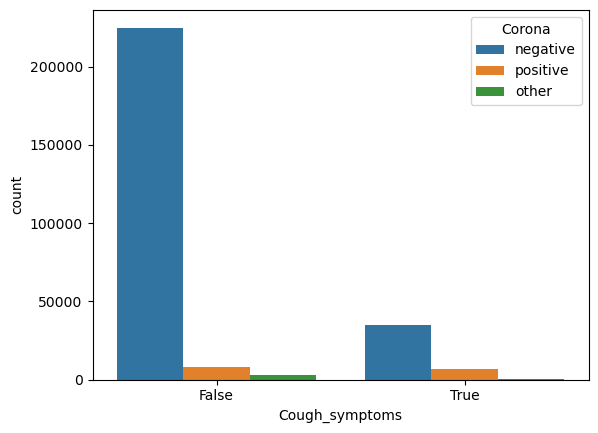

In [12]:
df.dropna(subset=['Cough_symptoms'],inplace=True)


sns.countplot(df,x='Cough_symptoms',hue='Corona')


In [13]:
# percentage of patients who had cough_symptoms who tested positive for corona
print(len(df.loc[(df['Cough_symptoms']==True) & (df['Corona']=='positive')])/len(df.loc[df['Cough_symptoms']==True])*100)


# percentageof patients who tested positive for cough symptoms but still tested negative for Corona
print(len(df.loc[(df['Cough_symptoms']==True) & (df['Corona']=='negative')])/len(df.loc[df['Cough_symptoms']==True])*100)


#
print(len(df.loc[(df['Cough_symptoms']==False) & (df['Corona']=='positive')])/len(df.loc[df['Cough_symptoms']==False])*100)



15.591550629913801
82.85260964289097
3.431936641169701


No of patients who tested negative for Cough_symptoms are more as comapared to those who tested positive.

82% of patients who had cough symptoms but tested negative for Corona.

Only 3% of patients who tested negative for cough symptoms tested positive for corona.

<Axes: xlabel='Headache', ylabel='count'>

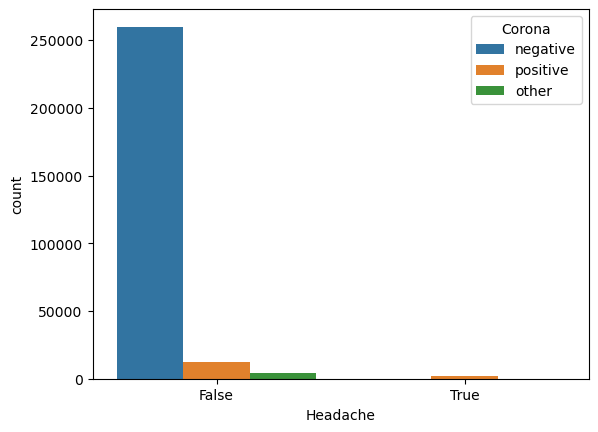

In [14]:
sns.countplot(df,x='Headache',hue='Corona')

Patients who do not have headache significantly more as compared to those who do.
We can see from the plot that patients who had headache were tested postive for Corona.
More than 90% of patients who didn't have headache were tested negative for Corona.


In [15]:
# Percentage of patients who had headache and tested positive for Corona
print(len(df.loc[(df['Headache']==True) & (df['Corona']=='positive')])/len(df.loc[df['Headache']==True])*100)

# percentage of patients who did not have headache and tested negative for Corona
print(len(df.loc[(df['Headache']==False) & (df['Corona']=='negative')])/len(df.loc[df['Headache']==False])*100)

92.61410788381743
94.08912834104552


<Axes: xlabel='Sore_throat', ylabel='count'>

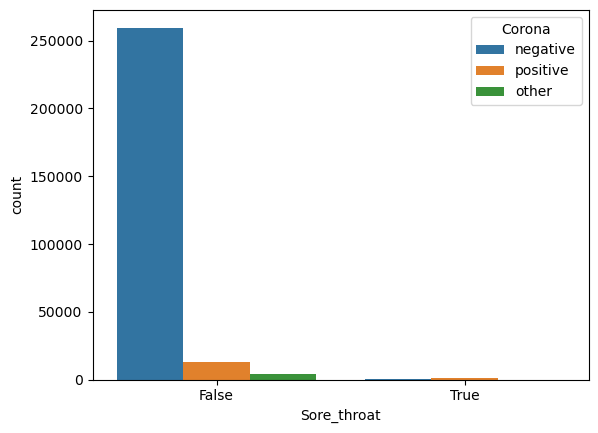

In [16]:
sns.countplot(df,x='Sore_throat',hue='Corona')

Number of patients who are not having sore_throat as a symptom are more as compared to patients that dont.
Almost 70% of the patients who have sore throat have tested positive for Corona

In [17]:
print(len(df.loc[(df['Sore_throat']==True) & (df['Corona']=='positive')])/len(df.loc[df['Sore_throat']==True])*100)

79.24037460978148


In [18]:
df.dropna(subset=['Fever'],inplace=True)

<Axes: xlabel='Fever', ylabel='count'>

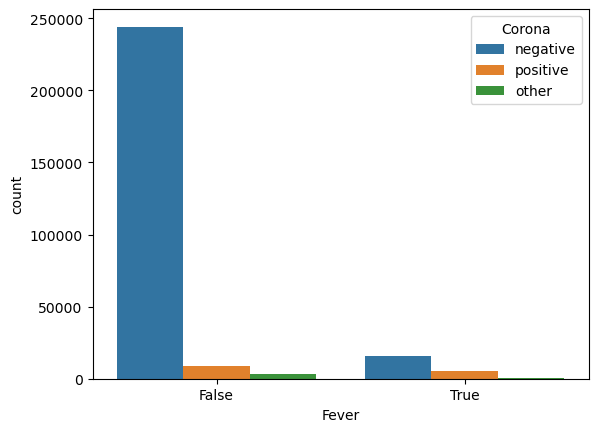

In [19]:
sns.countplot(df,x='Fever',hue='Corona')

No of patients who had fever and tested positive for Corona are less as compared to those who had fever but no corona.
No of patients do did not have fever forms almost 90% of the total data.The column fever as a standalone column will not be useful for training the model but it might be useful when used in combination with other symptoms.

We can use pandas profiling to find out other statistics.
We can drop test_date and the Ind column as it won't be playing any role in the data analysis or in training a model.

In [20]:
df=df.drop(['Ind_ID','Test_date'],axis=1)

In [21]:
 from ydata_profiling import ProfileReport

In [22]:
prof = ProfileReport(df)
prof.to_file(output_file='output_covid_prediction.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

We can infer from the output_covid_prediction file that headache and known_contact have high correlation with the output column that is Corona follwed by Sore_throat.

## Handling for missing values.

In [24]:
df.isnull().mean()*100

Cough_symptoms          0.000000
Fever                   0.000000
Sore_throat             0.000000
Shortness_of_breath     0.000000
Headache                0.000000
Corona                  0.000000
Age_60_above           45.699118
Sex                     7.018098
Known_contact           0.000000
dtype: float64

The Age column has 45% missing values and Sex coloumn has 7% missing values.These two columns needs to be imputed.

Deleting the records which have null values in Cough_symptoms and Fever.

In [25]:
print(df['Age_60_above'].mode())
df['Sex'].mode()


0    No
Name: Age_60_above, dtype: object


0    female
Name: Sex, dtype: object

We will use label_encoder from scikit to convert all the categorical columns to numerical.
The boolean values will be changed to a number.
True will have value1,False will have value 0 and the Nan will have value 2.

In [13]:
df['Age_60_above'].isnull='Nan'
df['Sex'].isnull='Nan'

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder=LabelEncoder()

In [28]:
for column in df:
    df[column]=label_encoder.fit_transform(df[column])

In [29]:
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,0,2,2,0
1,0,1,0,0,0,2,2,2,0
2,0,1,0,0,0,2,2,2,0
3,1,0,0,0,0,0,2,2,0
4,1,0,0,0,0,0,2,2,1


## Splitting the data into training and the test data using sklearn module train_test_split.

We use scikit to both impute and to split the data into train and test data.

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Corona']),df['Corona'],test_size=0.2)

In [32]:
x_train

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
273597,0,0,0,0,0,2,1,2
75786,0,0,0,0,0,0,1,2
196577,1,1,0,0,0,2,1,0
263509,0,0,0,0,0,2,0,2
145501,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...
107342,0,0,0,0,0,1,1,2
228173,0,0,0,0,0,2,0,2
54137,0,0,0,0,0,0,0,2
124264,1,0,0,0,0,1,1,2


In [21]:
y_train

253157    0
189016    0
56449     0
110835    0
100621    0
         ..
221774    0
80148     0
5707      0
218256    0
120674    0
Name: Corona, Length: 222875, dtype: int32

In [33]:
imputer=SimpleImputer(strategy='most_frequent')

In [34]:
x_train=imputer.fit_transform(x_train)
x_test=imputer.transform(x_test)

In [35]:
x_train

array([[0, 0, 0, ..., 2, 1, 2],
       [0, 0, 0, ..., 0, 1, 2],
       [1, 1, 0, ..., 2, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 2],
       [1, 0, 0, ..., 1, 1, 2],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Training the model. 

Let us import the necessary training models from scikitlearn.
Since its a classification problem we will be using the following algorithms to train the model.
logistic regression
Decision Tree
RandomForest
Support Vector 

In [42]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression

In [37]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Logistic Regression Accuracy:',accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
print('Logistic Regression Precision:',precision)

Logistic Regression Accuracy: 0.9432150612896858
Logistic Regression Precision: 0.9264731284352398


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [38]:
tree = DecisionTreeClassifier() 
tree.fit(x_train, y_train) 
y_pred = tree.predict(x_test) 
print(" Decision Tree Accuracy:", accuracy_score(y_test, 
                                  y_pred))
precision = precision_score(y_test, y_pred, average='weighted')
print(' Decision Tree Precision:',precision)

 Decision Tree Accuracy: 0.9559396256214218
 Decision Tree Precision: 0.9399087008182624


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [39]:
#Random Forest
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(" Random Forest Accuracy:", accuracy_score(y_test, 
                                  y_pred))
precision = precision_score(y_test, y_pred, average='weighted')
print(' Random Forest Precision:',precision)

 Random Forest Accuracy: 0.9559755200201009
 Random Forest Precision: 0.9399523925290695


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K nearest neighbor

In [47]:
k_n = KNeighborsClassifier()
k_n.fit(x_train,y_train)
y_pred=k_n.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, 
                                  y_pred))
print('KNN Precision',precision_score(y_test,y_pred,average='weighted'))


KNN Accuracy: 0.9525834993449273
KNN Precision 0.9368873781975272


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can conclude that Decision tree or Random Forest has a better accuracy and precision as compared to others.